<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/Modelo_de_Predi%C3%A7%C3%A3o_CHESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

<ipython-input-1-d761e2c91b68>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
dados = pd.read_csv("/content/drive/MyDrive/Python/tabelas/games.csv")

In [3]:
dados.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
dados.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
dados['rated'] = np.multiply(dados['rated'], 1)

In [12]:
df = pd.DataFrame(data=dados,columns=['winner','rated','turns','victory_status','white_rating','black_rating','opening_ply'])


In [13]:
df.head(10)

,winner,rated,turns,victory_status,white_rating,black_rating,opening_ply
0,white,0,13,outoftime,1500,1191,5
1,black,1,16,resign,1322,1261,4
2,white,1,61,mate,1496,1500,3
3,white,1,61,mate,1439,1454,3
4,white,1,95,mate,1523,1469,5
5,draw,0,5,draw,1250,1002,4
6,white,1,33,resign,1520,1423,10
7,black,0,9,resign,1413,2108,5
8,black,1,66,resign,1439,1392,6
9,white,1,119,mate,1381,1209,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   winner          20058 non-null  object
 1   rated           20058 non-null  int64 
 2   turns           20058 non-null  int64 
 3   victory_status  20058 non-null  object
 4   white_rating    20058 non-null  int64 
 5   black_rating    20058 non-null  int64 
 6   opening_ply     20058 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ MB


In [15]:
df.describe()

,rated,turns,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,0.805414,60.465999,1596.631868,1588.831987,4.816981
std,0.395891,33.570585,291.253376,291.036126,2.797152
min,0.000000,1.000000,784.000000,789.000000,1.000000
25%,1.000000,37.000000,1398.000000,1391.000000,3.000000
50%,1.000000,55.000000,1567.000000,1562.000000,4.000000
75%,1.000000,79.000000,1793.000000,1784.000000,6.000000
max,1.000000,349.000000,2700.000000,2723.000000,28.000000


In [16]:
# tirando os empates da base de dados
linhas_com_draw = df[df['winner'].str.contains('draw')]
df.drop(linhas_com_draw.index,inplace=True)

In [17]:
prop_vitoria_brancas = round(np.multiply(df.winner == 'white',1).sum()/len(df),5)
prop_vitoria_pretas = round(np.multiply(df.winner == 'black',1).sum()/len(df),5)
prop_empate = round(np.multiply(df.winner == 'draw',1).sum()/len(df),5)
print("A proporção de vitória das brancas é: ",prop_vitoria_brancas)
print("A proporção de vitória das pretas é: ",prop_vitoria_pretas)
print("A proporção de empates é: ",prop_empate)

A proporção de vitória das brancas é:  0.52339
A proporção de vitória das pretas é:  0.47661
A proporção de empates é:  0.0


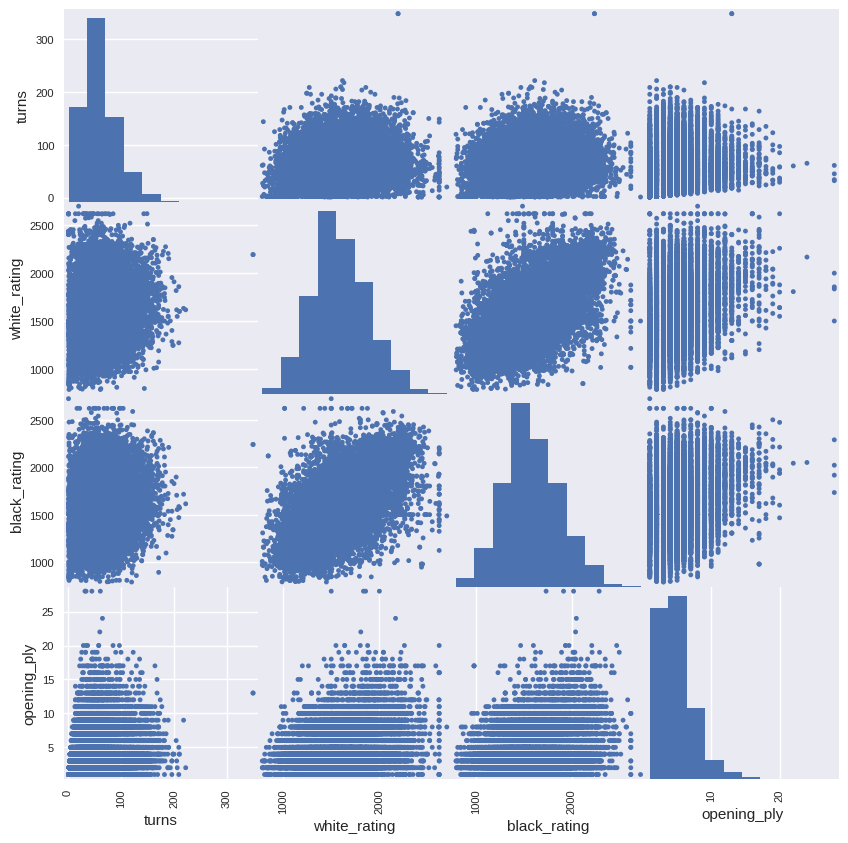

In [18]:
pd.plotting.scatter_matrix(df[["turns","white_rating","black_rating","opening_ply"]], alpha=1, figsize=(10, 10))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'classificacao'

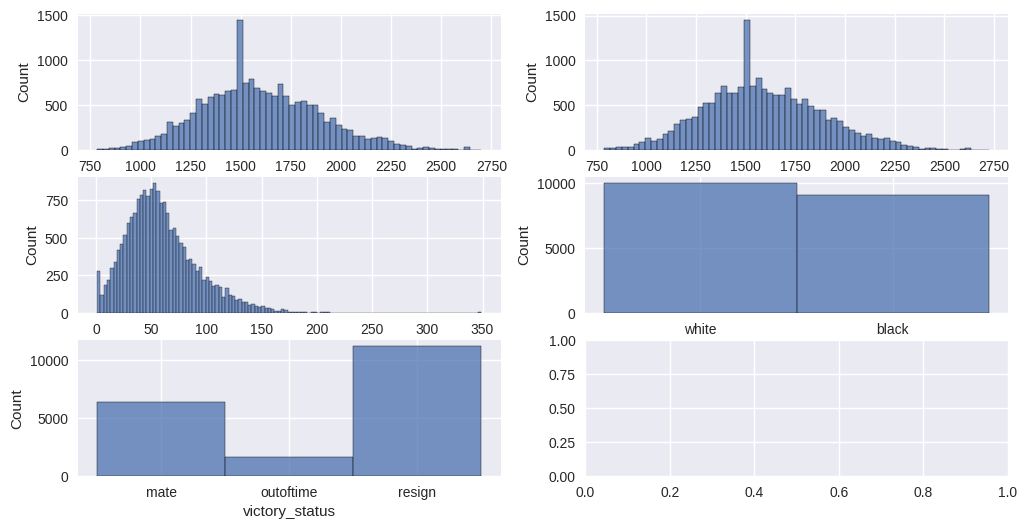

In [22]:
plt.figure(figsize = ((12, 6)))
plt.subplot(3, 2, 1)
sns.histplot(df.white_rating)

plt.subplot(3, 2, 2)
sns.histplot(df.black_rating)

plt.subplot(3, 2, 3)
sns.histplot(df.turns)

plt.subplot(3, 2, 4)
sns.histplot(df.winner)

plt.subplot(3, 2, 5)
sns.histplot(df.victory_status)

plt.subplot(3, 2, 6)
sns.histplot(df.classificacao)

plt.show()

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [24]:
df['victory_status'] = df['victory_status'].astype('category')


In [25]:
modelo = smf.glm(formula='winner ~ victory_status + white_rating + black_rating + turns', data=df,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                         Generalized Linear Model Regression Results                          
Dep. Variable:     ['winner[black]', 'winner[white]']   No. Observations:                19108
Model:                                            GLM   Df Residuals:                    19102
Model Family:                                Binomial   Df Model:                            5
Link Function:                                  Logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -11727.
Date:                                Thu, 18 Jan 2024   Deviance:                       23454.
Time:                                        14:09:14   Pearson chi2:                 1.97e+04
No. Iterations:                                     5   Pseudo R-squ. (CS):             0.1450
Covariance Type:                            nonrobust                                         
                                  coef    std err 

In [26]:
# INTERPRETAÇÃO DOS PARÂMETROS
print((np.exp(modelo.params[1:]) - 1) * 100)

victory_status[T.outoftime]    13.001276
victory_status[T.resign]        5.785262
white_rating                   -0.384221
black_rating                    0.389761
turns                           0.246258
dtype: float64


In [28]:

model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = df[['winner', 'victory_status', 'white_rating', 'black_rating','turns']].dropna()
y = baseline_df.winner
X = pd.get_dummies(baseline_df[['victory_status', 'white_rating', 'black_rating','turns']], drop_first=True)



In [29]:
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

In [30]:
yhat = model.predict_proba(X)
yhat = yhat[:, 1]

In [31]:
confusion_matrix(y, model.predict(X))

array([[5340, 3767],
       [2837, 7164]])

In [32]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.6544 de acurácia.


In [33]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

       black       0.65      0.59      0.62      9107
       white       0.66      0.72      0.68     10001

    accuracy                           0.65     19108
   macro avg       0.65      0.65      0.65     19108
weighted avg       0.65      0.65      0.65     19108



In [34]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.72


In [35]:
eu = pd.DataFrame({ 'white_rating':1300, 'black_rating':1400, 'turns':30,'victory_status_outoftime':0,'victory_status_resign':1}, index=[0])
prob = model.predict_proba(eu)
print('A probabilidade das brancas terem ganho este jogo é de: {}%'\
      .format(round(prob[:,1][0]*100, 2)))

A probabilidade das brancas terem ganho este jogo é de: 44.19%
